<a href="https://colab.research.google.com/github/Tom-Yuen/TomY_Little_Projects/blob/main/Banana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

# Try reading the file with Latin-1 encoding
df = pd.read_csv('https://assets.publishing.service.gov.uk/media/66b5e77ca3c2a28abb50df7b/bananas-12aug24.csv', encoding='latin-1')

print(df)

               Origin        Date  Price Units
0              belize  09/08/2024   0.94  £/kg
1            colombia  09/08/2024   0.90  £/kg
2          costa_rica  09/08/2024   0.98  £/kg
3            honduras  09/08/2024   0.88  £/kg
4              panama  09/08/2024   0.90  £/kg
...               ...         ...    ...   ...
13204       guatemala  20/01/1995   0.64  £/kg
13205      guadeloupe  20/01/1995   0.61  £/kg
13206         surinam  13/01/1995   0.61  £/kg
13207  windward_isles  13/01/1995   0.60  £/kg
13208      guadeloupe  13/01/1995   0.60  £/kg

[13209 rows x 4 columns]


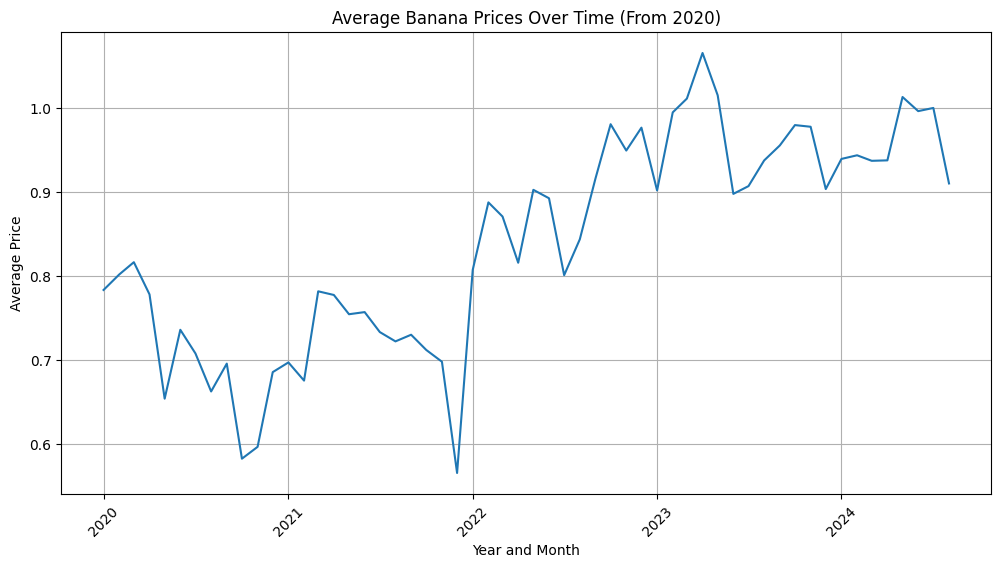

In [5]:
# prompt: x-axis = year and month, ignore column origin
# y axis = price

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Try reading the file with Latin-1 encoding
df = pd.read_csv('https://assets.publishing.service.gov.uk/media/66b5e77ca3c2a28abb50df7b/bananas-12aug24.csv', encoding='latin-1')

# Filter data from 1/1/2020 onwards
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df = df[df['Date'] >= '2020-01-01']

# Extract year and month from the 'Date' column
df['YearMonth'] = df['Date'].dt.to_period('M').dt.to_timestamp()

# Group data by 'YearMonth' and calculate the average price
average_prices = df.groupby('YearMonth')['Price'].mean()

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(average_prices.index, average_prices.values)
plt.xlabel('Year and Month')
plt.ylabel('Average Price')
plt.title('Average Banana Prices Over Time (From 2020)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



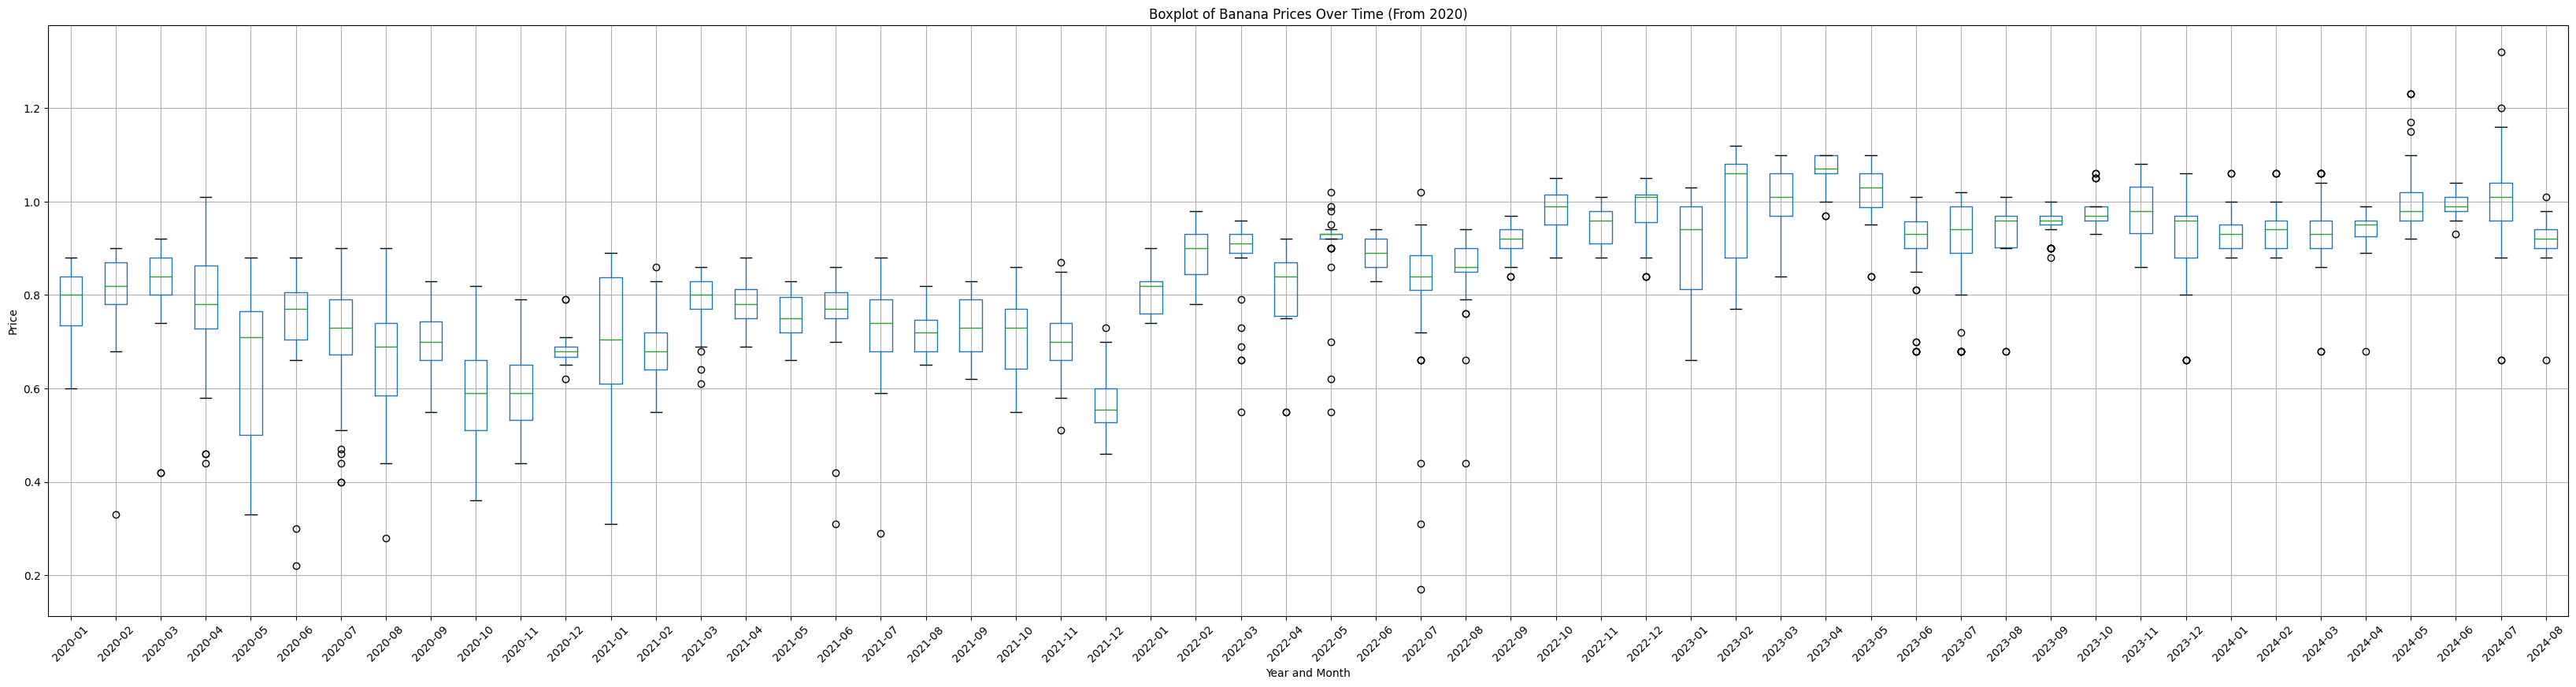

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure plots are displayed inline in Colab
%matplotlib inline

# Try reading the file with Latin-1 encoding
df = pd.read_csv('https://assets.publishing.service.gov.uk/media/66b5e77ca3c2a28abb50df7b/bananas-12aug24.csv', encoding='latin-1')

# Filter data from 1/1/2020 onwards
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df = df[df['Date'] >= '2020-01-01']

# Extract year and month from the 'Date' column
df['YearMonth'] = df['Date'].dt.to_period('M')

# Create a wide figure and axes
fig, ax = plt.subplots(figsize=(40, 10))  # Increased width to 40 and height to 10
df.boxplot(column='Price', by='YearMonth', ax=ax)
ax.set_xlabel('Year and Month')
ax.set_ylabel('Price')
ax.set_title('Boxplot of Banana Prices Over Time (From 2020)')
plt.suptitle('')  # Remove the automatic 'Boxplot grouped by YearMonth' title
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(True)
plt.show()


Mean Squared Error: 0.014635853279734833
R-squared: 0.42267838040131456


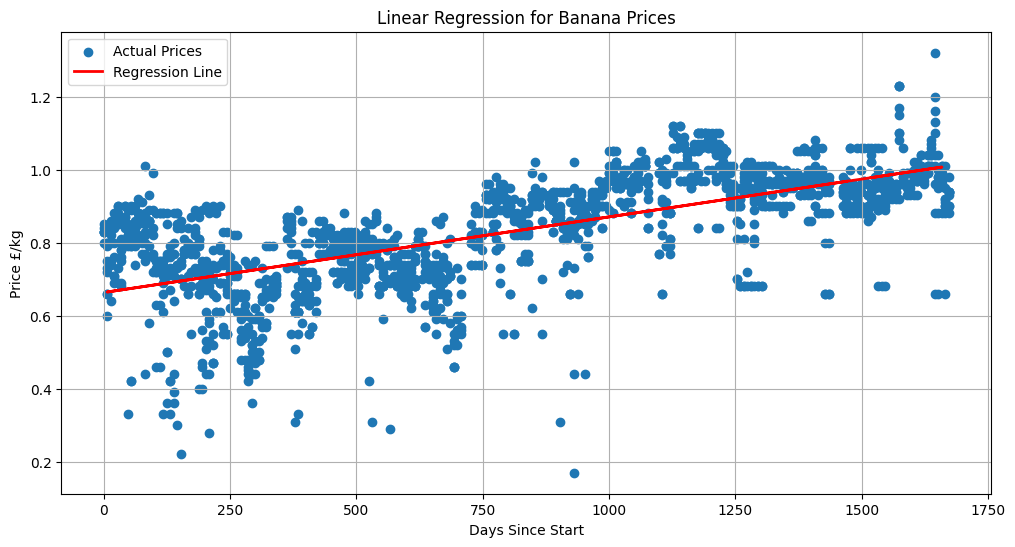

Predicted price for 2025-01-01: 1.0398323075671543


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [7]:
# prompt: make a regression so we can estimate the price in future

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Convert 'Date' to numerical representation (days since a reference date)
df['DaysSinceStart'] = (df['Date'] - df['Date'].min()).dt.days

# Features (X) and target variable (y)
X = df[['DaysSinceStart']]
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

# Plot the regression line
plt.figure(figsize=(12, 6))
plt.scatter(df['DaysSinceStart'], df['Price'], label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Days Since Start')
plt.ylabel('Price £/kg')
plt.title('Linear Regression for Banana Prices')
plt.legend()
plt.grid(True)
plt.show()

# Example: Predicting price for a future date
future_date = pd.to_datetime('2025-01-01')
days_since_start_future = (future_date - df['Date'].min()).days
future_price_prediction = model.predict([[days_since_start_future]])
print('Predicted price for 2025-01-01:', future_price_prediction[0])


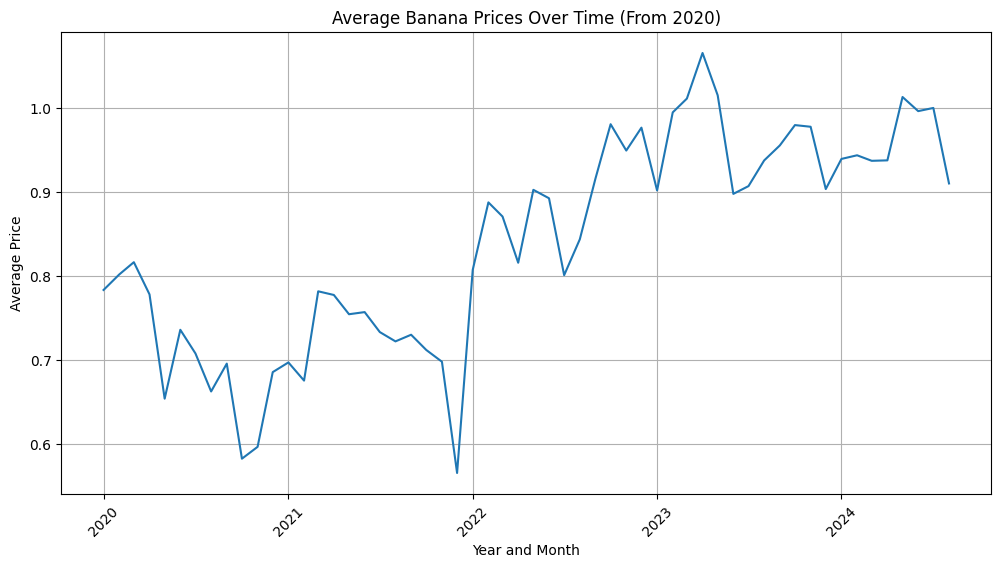

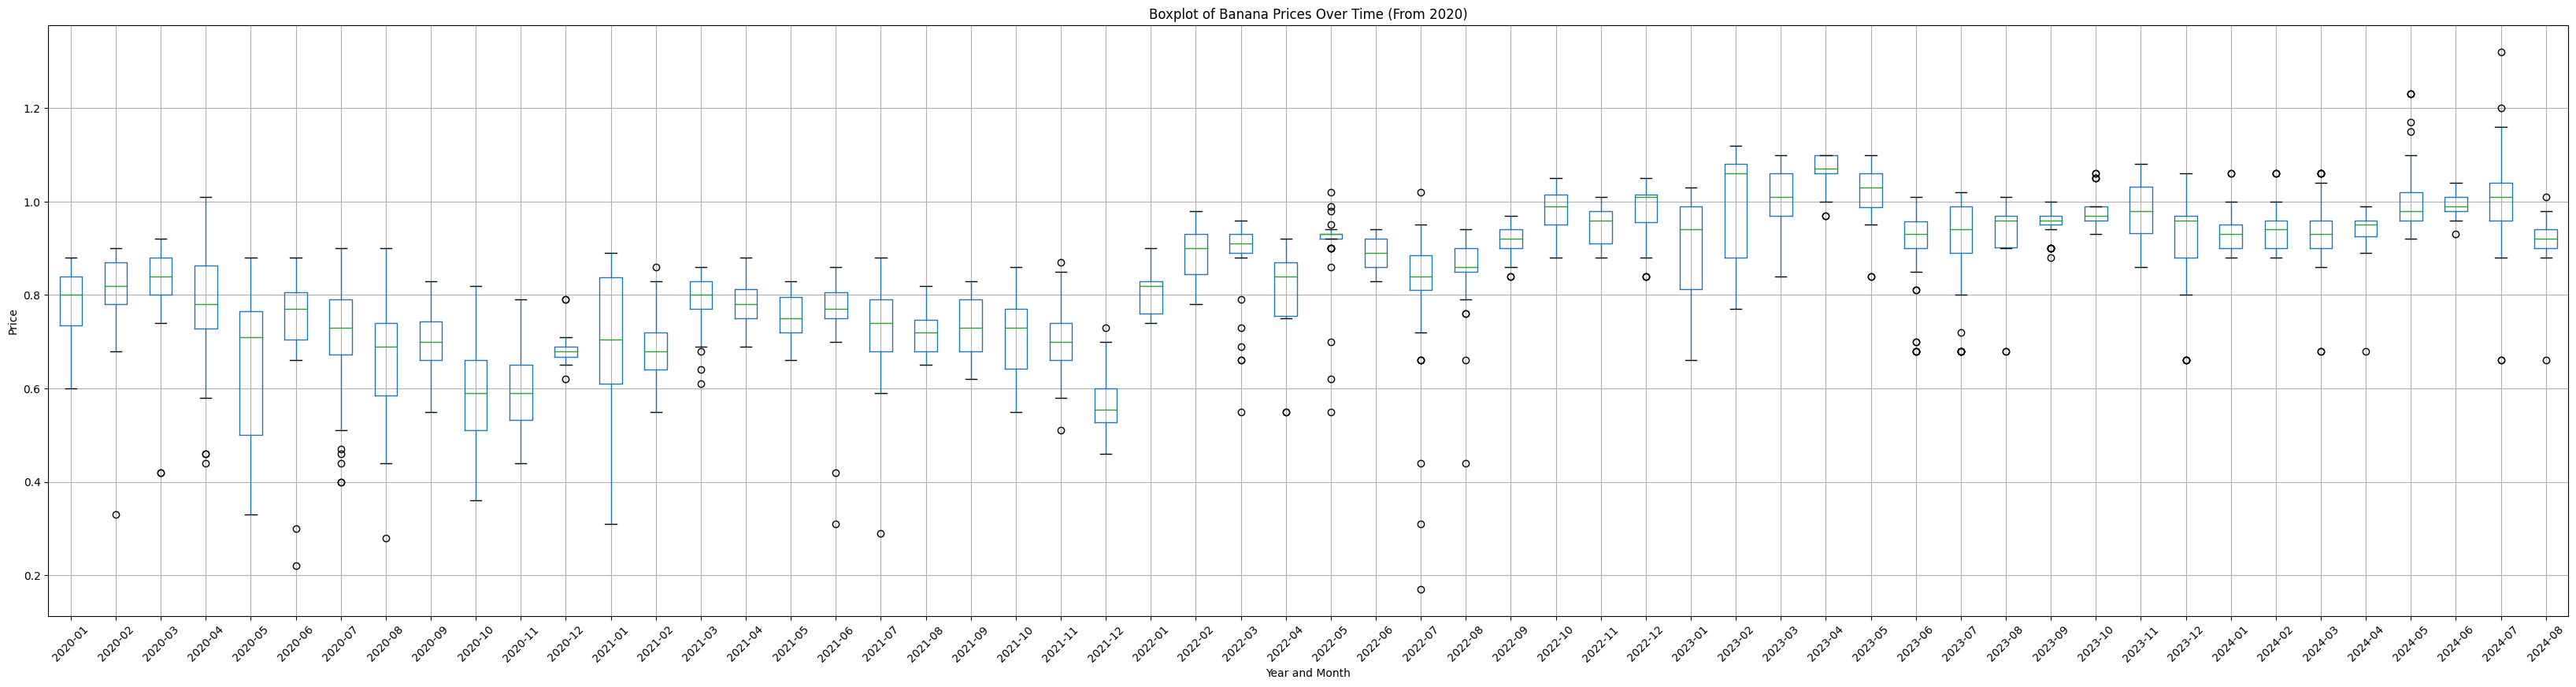

Mean Squared Error: 0.014635853279734833
R-squared: 0.42267838040131456


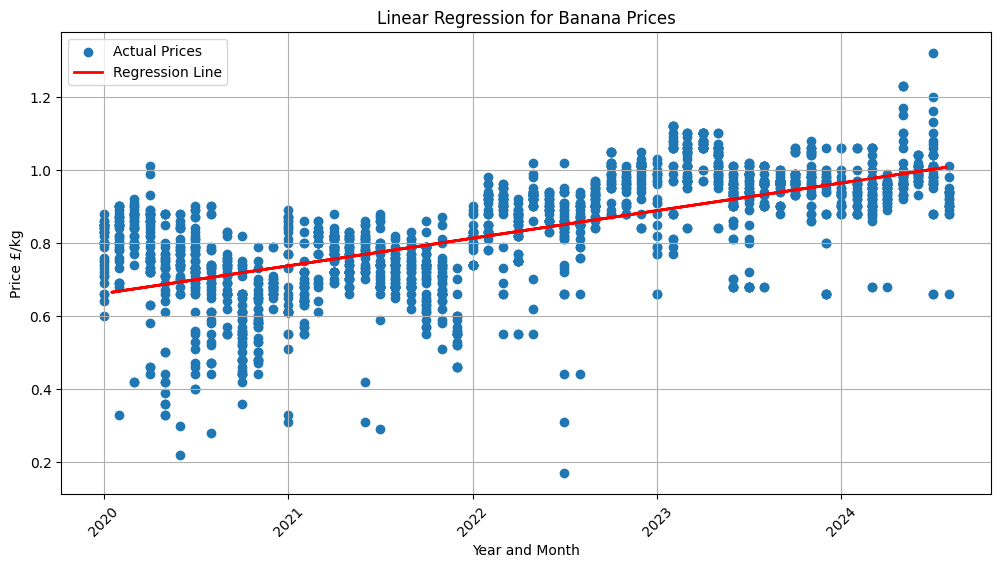

Predicted price for 2025-01-01: 1.0398323075671543


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [8]:
# prompt: for the linear regression chart, can we use month and year in x-axis

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Try reading the file with Latin-1 encoding
df = pd.read_csv('https://assets.publishing.service.gov.uk/media/66b5e77ca3c2a28abb50df7b/bananas-12aug24.csv', encoding='latin-1')

# Filter data from 1/1/2020 onwards
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df = df[df['Date'] >= '2020-01-01']

# Extract year and month from the 'Date' column
df['YearMonth'] = df['Date'].dt.to_period('M').dt.to_timestamp()

# Group data by 'YearMonth' and calculate the average price
average_prices = df.groupby('YearMonth')['Price'].mean()

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(average_prices.index, average_prices.values)
plt.xlabel('Year and Month')
plt.ylabel('Average Price')
plt.title('Average Banana Prices Over Time (From 2020)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



# Ensure plots are displayed inline in Colab
%matplotlib inline

# Try reading the file with Latin-1 encoding
df = pd.read_csv('https://assets.publishing.service.gov.uk/media/66b5e77ca3c2a28abb50df7b/bananas-12aug24.csv', encoding='latin-1')

# Filter data from 1/1/2020 onwards
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df = df[df['Date'] >= '2020-01-01']

# Extract year and month from the 'Date' column
df['YearMonth'] = df['Date'].dt.to_period('M')

# Create a wide figure and axes
fig, ax = plt.subplots(figsize=(40, 10))  # Increased width to 40 and height to 10
df.boxplot(column='Price', by='YearMonth', ax=ax)
ax.set_xlabel('Year and Month')
ax.set_ylabel('Price')
ax.set_title('Boxplot of Banana Prices Over Time (From 2020)')
plt.suptitle('')  # Remove the automatic 'Boxplot grouped by YearMonth' title
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(True)
plt.show()



# Convert 'Date' to numerical representation (days since a reference date)
df['DaysSinceStart'] = (df['Date'] - df['Date'].min()).dt.days

# Features (X) and target variable (y)
X = df[['DaysSinceStart']]
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

# Plot the regression line with YearMonth on the x-axis
plt.figure(figsize=(12, 6))
plt.scatter(df['YearMonth'].dt.to_timestamp(), df['Price'], label='Actual Prices')

# Convert X_test to datetime for plotting
X_test_dates = df['Date'].min() + pd.to_timedelta(X_test['DaysSinceStart'], unit='D')

plt.plot(X_test_dates, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Year and Month')
plt.ylabel('Price £/kg')
plt.title('Linear Regression for Banana Prices')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend()
plt.grid(True)
plt.show()

# Example: Predicting price for a future date
future_date = pd.to_datetime('2025-01-01')
days_since_start_future = (future_date - df['Date'].min()).days
future_price_prediction = model.predict([[days_since_start_future]])
print('Predicted price for 2025-01-01:', future_price_prediction[0])



In [9]:
# prompt: pivot table, origin on the left, and average price for period 2021-2024 on the right, one column for each year, sorted by price 2024

# Pivot table, origin on the left, and average price for period 2021-2024 on the right
pivot_table = df[df['Date'].dt.year.isin([2021, 2022, 2023, 2024])].pivot_table(
    index='Origin',
    columns=df['Date'].dt.year,
    values='Price',
    aggfunc='mean'
).sort_values(by=2024, ascending=False)

print(pivot_table)


Date                    2021      2022      2023      2024
Origin                                                    
brazil              0.812500  0.880000       NaN  1.060000
belize              0.686538  0.851154  0.835500  0.992400
costa_rica          0.802200  0.939800  1.009184  0.988065
guatemala           0.709388  0.884167  0.978444  0.982609
acp_bananas         0.686923  0.816250  0.851290  0.979200
all_bananas         0.736200  0.906800  0.974694  0.963871
dollar_bananas      0.745400  0.915600  0.990204  0.961290
nicaragua           0.770000       NaN  0.979000  0.960000
colombia            0.682250  0.884615  0.983043  0.950000
panama              0.763488  0.900571  0.970882  0.936400
ivory_coast         0.692857  0.715000  0.932667  0.930000
honduras                 NaN  0.828333  1.100000  0.880000
dominican_republic  0.652381  0.798000  0.816667  0.876250
ecuador             0.682222  0.725000  0.947949  0.795714
cameroon            0.800000  0.565000  0.660000       N

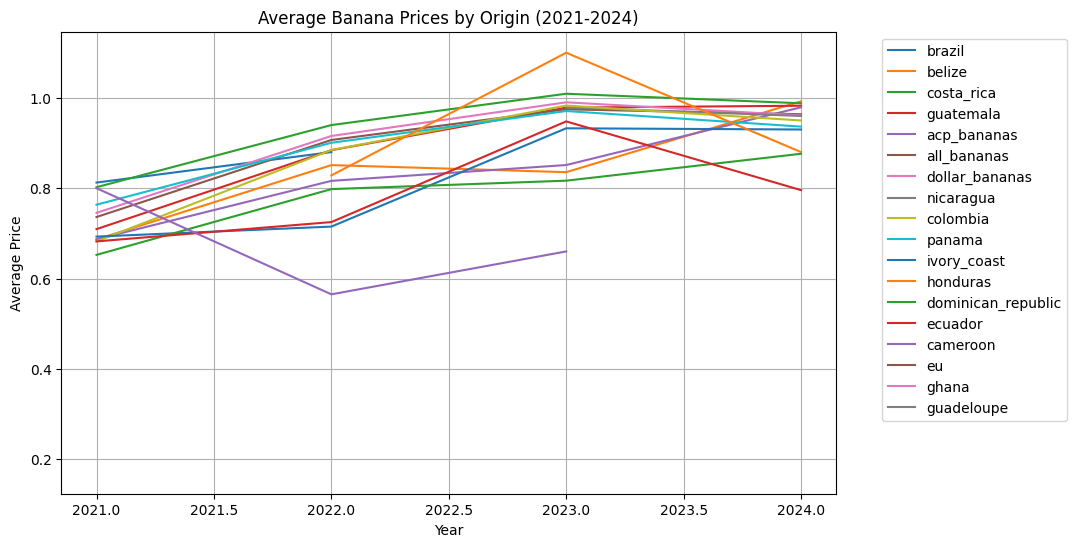

In [10]:
# prompt: generate a line chart for this pivot table, legend on the right

import matplotlib.pyplot as plt
pivot_table.T.plot(figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Banana Prices by Origin (2021-2024)')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [11]:
# prompt: show me the rmse and mse of learn set and test set

# Make predictions on the training data
y_train_pred = model.predict(X_train)

# Calculate RMSE and MSE for training set
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mse = mean_squared_error(y_train, y_train_pred, squared=True)

# Calculate RMSE and MSE for testing set
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
test_mse = mean_squared_error(y_test, y_pred, squared=True)

print('Training RMSE:', train_rmse)
print('Training MSE:', train_mse)
print('Testing RMSE:', test_rmse)
print('Testing MSE:', test_mse)


Training RMSE: 0.1140023808426471
Training MSE: 0.01299654283779195
Testing RMSE: 0.1209787306915345
Testing MSE: 0.014635853279734833


In [46]:
# prompt: import datetime, df_avg_price= df group by Date and summarize by average of Price, and define type of Date into datetime, add column date_ordinal and apply
import datetime as dt
import pandas as pd
# Group by 'Date' and calculate average price
df_avg_price = df.groupby('Date')['Price'].mean().reset_index()

# Convert 'Date' to datetime
df_avg_price['Date'] = pd.to_datetime(df_avg_price['Date'])

# Add 'date_ordinal' column
df_avg_price['date_ordinal'] = df_avg_price['Date'].apply(lambda date: date.toordinal())

print(df_avg_price)


          Date     Price  date_ordinal
0   2020-01-10  0.830000        737434
1   2020-01-17  0.723333        737441
2   2020-01-24  0.800000        737448
3   2020-01-31  0.788889        737455
4   2020-02-07  0.817778        737462
..         ...       ...           ...
225 2024-07-12  1.046000        739079
226 2024-07-19  0.935556        739086
227 2024-07-26  0.971429        739093
228 2024-08-02  0.894000        739100
229 2024-08-09  0.927778        739107

[230 rows x 3 columns]


# Plot based on date_ordinal

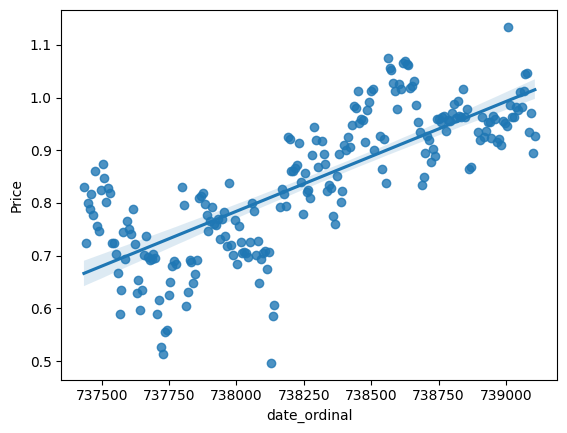

In [47]:
ax = sns.regplot(x="date_ordinal", y="Price", data=df_avg_price)
plt.show()

# Create Date label for mapping

In [52]:
ax.set_xlabel('date')
new_labels = [dt.date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)


<ipython-input-52-4bbcabc9fd85>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


[Text(737250.0, 0, '2019-07-10'),
 Text(737500.0, 0, '2020-03-16'),
 Text(737750.0, 0, '2020-11-21'),
 Text(738000.0, 0, '2021-07-29'),
 Text(738250.0, 0, '2022-04-05'),
 Text(738500.0, 0, '2022-12-11'),
 Text(738750.0, 0, '2023-08-18'),
 Text(739000.0, 0, '2024-04-24'),
 Text(739250.0, 0, '2024-12-30')]

# Replace x-axis with Date label

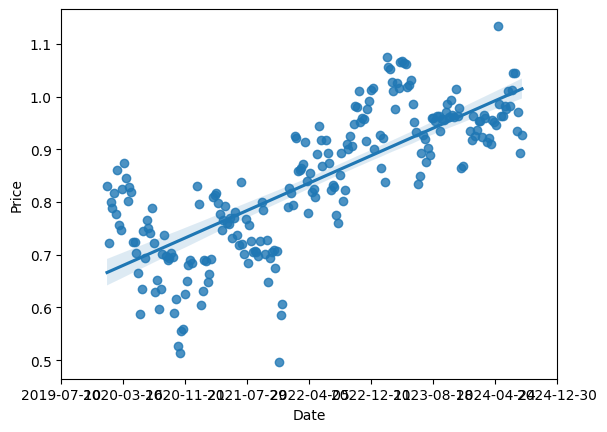

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

# Example DataFrame (you should replace this with your actual data)
# df_avg_price = pd.DataFrame({
#     'date_ordinal': [dt.date(2023, 1, 1).toordinal(), dt.date(2023, 1, 2).toordinal()],
#     'Price': [100, 200]
# })

# Plotting with seaborn
ax = sns.regplot(x="date_ordinal", y="Price", data=df_avg_price)

# Getting the x-ticks
xticks = ax.get_xticks()

# Converting ordinal dates to datetime dates
new_labels = [dt.date.fromordinal(int(item)) for item in xticks]

# Formatting the new labels as strings (optional, for better readability)
new_labels_formatted = [date.strftime('%Y-%m-%d') for date in new_labels]

# Setting the new x-ticks and labels
ax.set_xticks(xticks)  # Set the x-ticks to the original ticks
ax.set_xticklabels(new_labels_formatted)  # Set the x-tick labels to the new formatted labels

# Labeling the x-axis
ax.set_xlabel('Date')

# Display the plot
plt.show()


#Tidy up so x-axis doesn't overlap

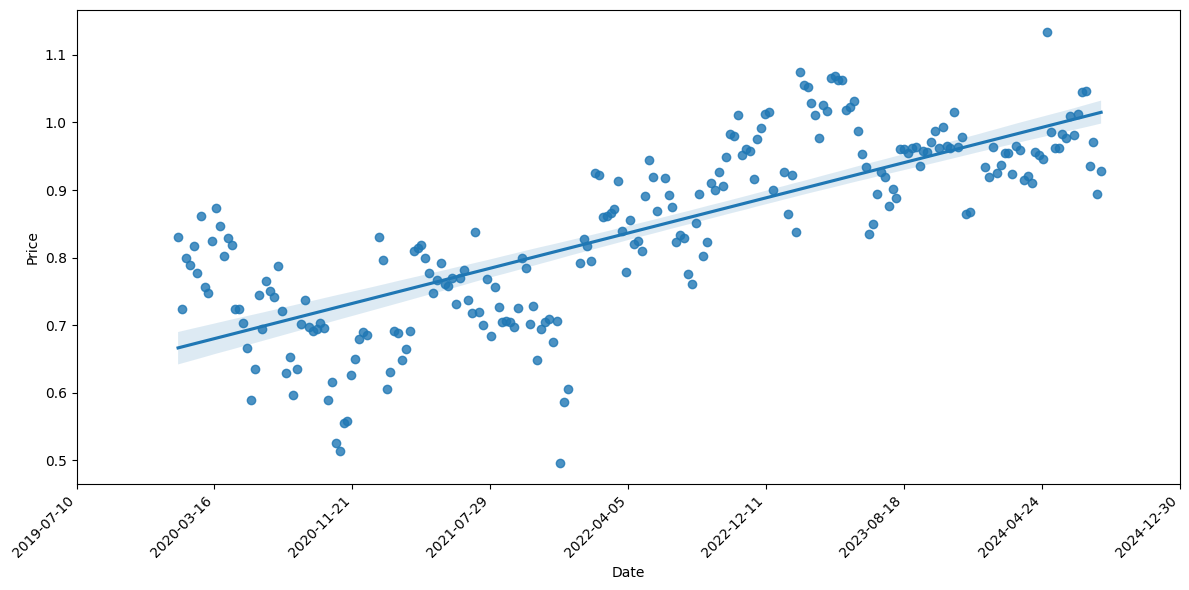

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

# Example DataFrame (replace with your actual data)
# df_avg_price = pd.DataFrame({
#     'date_ordinal': [dt.date(2023, 1, 1).toordinal(), dt.date(2023, 1, 2).toordinal()],
#     'Price': [100, 200]
# })

# Plotting with seaborn
fig, ax = plt.subplots(figsize=(12, 6))  # Increase figure size if necessary
sns.regplot(x="date_ordinal", y="Price", data=df_avg_price, ax=ax)

# Getting the x-ticks
xticks = ax.get_xticks()

# Converting ordinal dates to datetime dates
new_labels = [dt.date.fromordinal(int(item)) for item in xticks]

# Formatting the new labels as strings
new_labels_formatted = [date.strftime('%Y-%m-%d') for date in new_labels]

# Setting the new x-ticks and labels
ax.set_xticks(xticks)  # Set the x-ticks to the original ticks
ax.set_xticklabels(new_labels_formatted, rotation=45, ha='right')  # Rotate labels and adjust alignment

# Optionally, set interval for ticks (e.g., show every 2nd tick)
# interval = 2
# ax.set_xticks(xticks[::interval])
# ax.set_xticklabels([new_labels_formatted[i] for i in range(0, len(new_labels_formatted), interval)], rotation=45, ha='right')

# Labeling the x-axis
ax.set_xlabel('Date')

# Display the plot
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted price for 2025-01-01: 1.0398323075671543


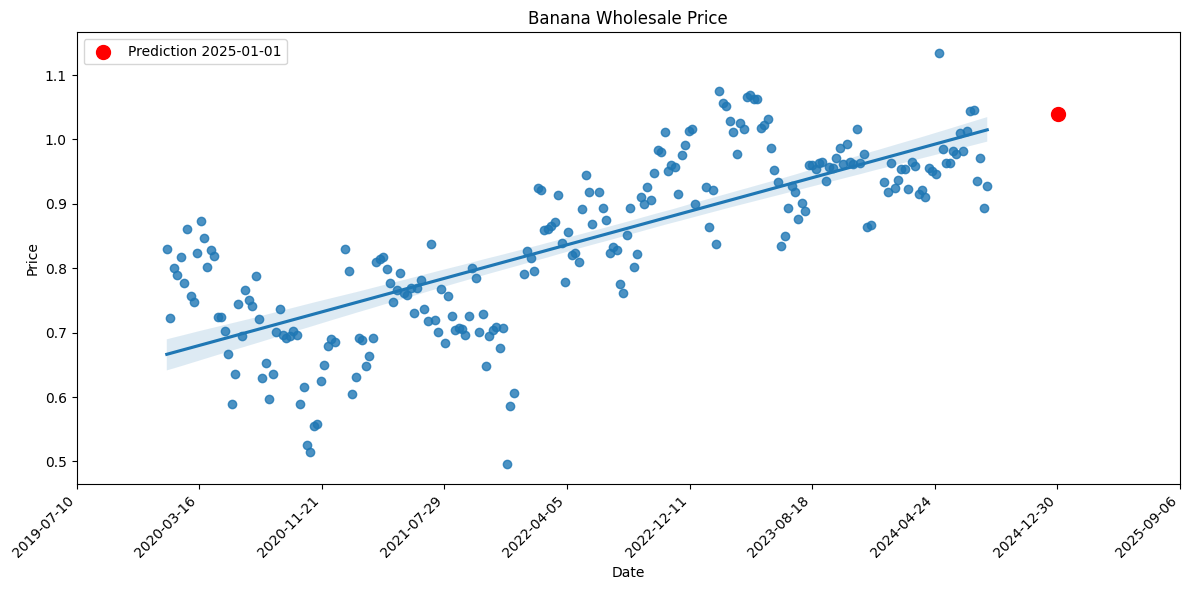

In [65]:
# prompt: predict the price on 01-01-2025, and plot it with red dot on the same regression plot

import pandas as pd
import matplotlib.pyplot as plt
# Example: Predicting price for a future date
future_date = pd.to_datetime('2025-01-01')
days_since_start_future = (future_date - df['Date'].min()).days
future_price_prediction = model.predict([[days_since_start_future]])
print('Predicted price for 2025-01-01:', future_price_prediction[0])

# ... (previous code)

# Plotting with seaborn
fig, ax = plt.subplots(figsize=(12, 6))  # Increase figure size if necessary
sns.regplot(x="date_ordinal", y="Price", data=df_avg_price, ax=ax)

# ... (previous code for formatting x-axis labels)

# Plot the prediction for 2025-01-01
ax.scatter(future_date.toordinal(), future_price_prediction[0], color='red', s=100, label='Prediction 2025-01-01')

# Getting the x-ticks
xticks = ax.get_xticks()

# Converting ordinal dates to datetime dates
new_labels = [dt.date.fromordinal(int(item)) for item in xticks]

# Formatting the new labels as strings
new_labels_formatted = [date.strftime('%Y-%m-%d') for date in new_labels]

# Setting the new x-ticks and labels
ax.set_xticks(xticks)  # Set the x-ticks to the original ticks
ax.set_xticklabels(new_labels_formatted, rotation=45, ha='right')  # Rotate labels and adjust alignment

# Optionally, set interval for ticks (e.g., show every 2nd tick)
# interval = 2
# ax.set_xticks(xticks[::interval])
# ax.set_xticklabels([new_labels_formatted[i] for i in range(0, len(new_labels_formatted), interval)], rotation=45, ha='right')

# Labeling the x-axis
ax.set_xlabel('Date')

# Adding a legend
ax.legend(loc='upper left')  # Place legend in the best location

# Adding a title
ax.set_title('Banana Wholesale Price')  # Add title here

# Display the plot
plt.tight_layout()  # Adjust layout to fit labels
plt.show()
